# Gradients and Gradient Descent

## Overview
In this notebook, we explore the role of **gradients** in optimization, which is fundamental for machine learning. We will:
- Compute gradients of simple functions analytically and using Python
- Visualize gradients to understand the direction of steepest descent
- Implement **gradient descent** for optimization
- Observe how step size affects convergence


In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt


## 1. Gradient of a simple function

A **gradient** is a vector that points in the direction of the steepest increase of a function. In machine learning, we often use the **negative gradient** to update parameters and minimize a loss function.

Let's start with a simple 1D function:

\[
f(x) = x^2
\]

The derivative (gradient) is:

\[
f'(x) = 2x
\]


In [ ]:
# Define the function
def f(x):
    return x**2

# Its gradient
def grad_f(x):
    return 2*x

# Compute gradient at some points
x_values = np.array([-3, -2, -1, 0, 1, 2, 3])
grad_values = grad_f(x_values)

for x, g in zip(x_values, grad_values):
    print(f"x = {x}, gradient = {g}")


x = -3, gradient = -6
x = -2, gradient = -4
x = -1, gradient = -2
x = 0, gradient = 0
x = 1, gradient = 2
x = 2, gradient = 4
x = 3, gradient = 6


### Observation
- At `x=3`, gradient = 6, pointing in the positive direction.
- At `x=-3`, gradient = -6, pointing in the negative direction.
- Gradient points **towards the steepest ascent**. In optimization, we move in the **opposite direction** to reach a minimum.


## 2. Visualizing the function and gradients


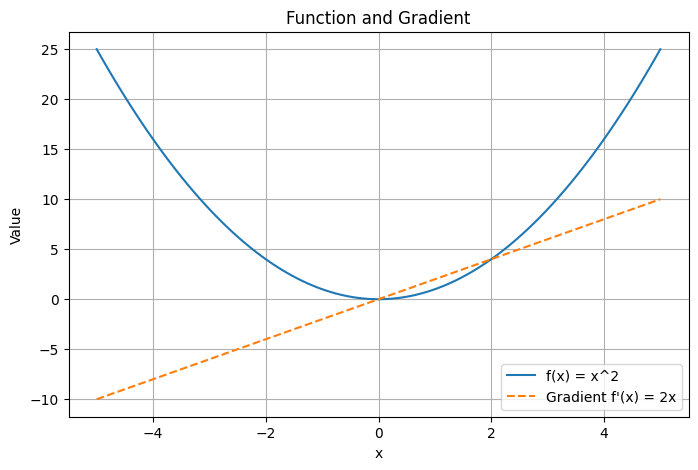

In [ ]:
# Plot the function and its gradient
x_plot = np.linspace(-5, 5, 100)
y_plot = f(x_plot)
grad_plot = grad_f(x_plot)

plt.figure(figsize=(8,5))
plt.plot(x_plot, y_plot, label="f(x) = x^2")
plt.plot(x_plot, grad_plot, label="Gradient f'(x) = 2x", linestyle='--')
plt.xlabel("x")
plt.ylabel("Value")
plt.title("Function and Gradient")
plt.legend()
plt.grid(True)
plt.show()


## 3. Gradient Descent

Gradient descent is an iterative optimization algorithm used to **minimize functions**. The update rule is:

\[
x_{\text{new}} = x_{\text{old}} - \alpha \cdot f'(x_{\text{old}})
\]

Where:
- \(\alpha\) is the learning rate (step size)
- \(f'(x)\) is the gradient at the current point


In [ ]:
# Gradient Descent Implementation
def gradient_descent(start, grad, learning_rate=0.1, iterations=10):
    x = start
    trajectory = [x]
    for i in range(iterations):
        x = x - learning_rate * grad(x)
        trajectory.append(x)
    return trajectory

# Run gradient descent
start_point = 4.0
lr = 0.1
iterations = 15
trajectory = gradient_descent(start_point, grad_f, lr, iterations)

print("Trajectory of x values:", trajectory)


Trajectory of x values: [4.0, 3.2, 2.56, 2.048, 1.6384, 1.31072, 1.0485760000000002, 0.8388608000000002, 0.6710886400000001, 0.5368709120000001, 0.4294967296000001, 0.3435973836800001, 0.27487790694400005, 0.21990232555520003, 0.17592186044416003, 0.140737488355328]


### 4. Visualizing Gradient Descent Trajectory


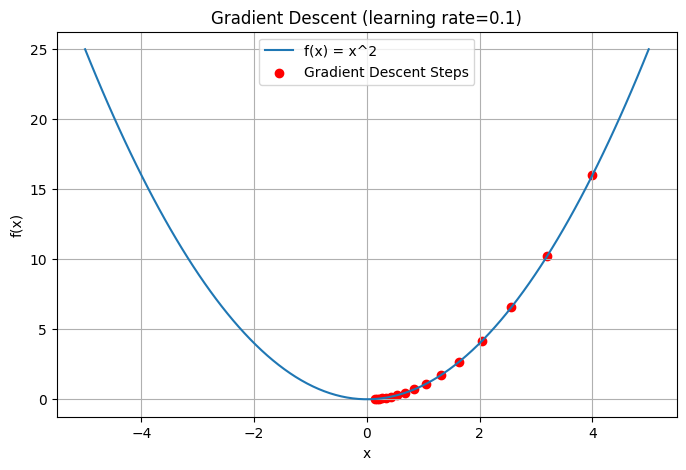

In [ ]:
# Plot trajectory on the function
plt.figure(figsize=(8,5))
plt.plot(x_plot, y_plot, label="f(x) = x^2")
plt.scatter(trajectory, [f(x) for x in trajectory], color='red', label="Gradient Descent Steps")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title(f"Gradient Descent (learning rate={lr})")
plt.legend()
plt.grid(True)
plt.show()


### Observations
- The red points show the **steps of gradient descent**.
- Step size (\(\alpha\)) affects convergence:
    - Too large → may overshoot the minimum
    - Too small → converges slowly
- Gradient descent moves **opposite to the gradient** to reach a minimum.


## 5. Gradient Descent on a 2D Function

For machine learning, functions are often multi-dimensional. Let's try:

\[
f(x, y) = x^2 + y^2
\]

The gradient is:

\[
\nabla f(x, y) = [2x, 2y]
\]


In [ ]:
# 2D gradient descent
def f2(X):
    x, y = X
    return x**2 + y**2

def grad_f2(X):
    x, y = X
    return np.array([2*x, 2*y])

def gradient_descent_2d(start, grad, learning_rate=0.1, iterations=10):
    X = np.array(start)
    trajectory = [X.copy()]
    for i in range(iterations):
        X = X - learning_rate * grad(X)
        trajectory.append(X.copy())
    return trajectory

# Run 2D gradient descent
start_point_2d = [3.0, 4.0]
trajectory_2d = gradient_descent_2d(start_point_2d, grad_f2, lr, iterations)

trajectory_2d


[array([3., 4.]),
 array([2.4, 3.2]),
 array([1.92, 2.56]),
 array([1.536, 2.048]),
 array([1.2288, 1.6384]),
 array([0.98304, 1.31072]),
 array([0.786432, 1.048576]),
 array([0.6291456, 0.8388608]),
 array([0.50331648, 0.67108864]),
 array([0.40265318, 0.53687091]),
 array([0.32212255, 0.42949673]),
 array([0.25769804, 0.34359738]),
 array([0.20615843, 0.27487791]),
 array([0.16492674, 0.21990233]),
 array([0.1319414 , 0.17592186]),
 array([0.10555312, 0.14073749])]

### 6. Visualizing 2D Gradient Descent

We can plot the path of gradient descent on a contour plot to see how it converges to the minimum.


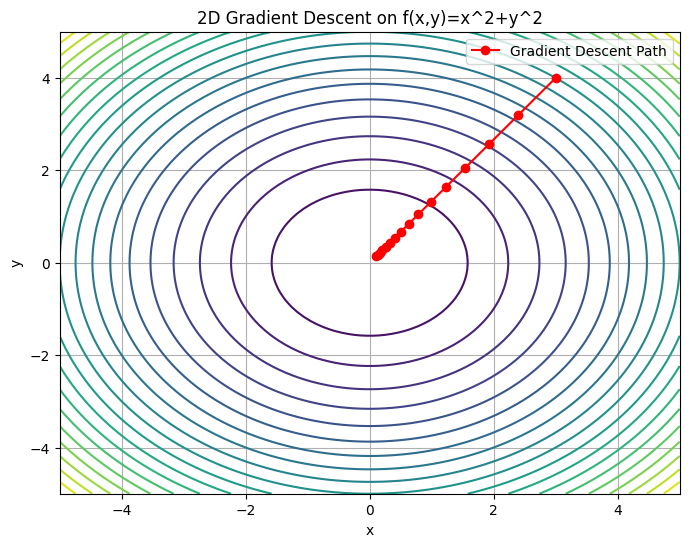

In [ ]:
# Contour plot
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2

trajectory_array = np.array(trajectory_2d)

plt.figure(figsize=(8,6))
plt.contour(X, Y, Z, levels=20)
plt.plot(trajectory_array[:,0], trajectory_array[:,1], marker='o', color='red', label="Gradient Descent Path")
plt.xlabel("x")
plt.ylabel("y")
plt.title("2D Gradient Descent on f(x,y)=x^2+y^2")
plt.legend()
plt.grid(True)
plt.show()


## Summary

- Gradients point in the direction of **steepest ascent**.
- Gradient descent moves in the **opposite direction** to minimize a function.
- Step size (\(\alpha\)) is crucial for convergence speed and stability.
- Gradient descent works in both 1D and multi-dimensional functions.
- These concepts are fundamental in **machine learning optimization**, e.g., training neural networks by minimizing a loss function.
